In [57]:
 # Import relevant libraries and packages.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv('df_cleaned.csv', index_col = False)

In [59]:
df.columns

Index(['patient', 'Age', 'Sex', 'Chest_Pain_Type', 'Resting_BP', 'Cholesterol',
       'Fasting_BS', 'Resting_ECG', 'Max_HR', 'Exercise_Induced_Angina',
       'ST_Depression', 'ST_Slope', 'Num_Major_Vessels', 'Thal_Test',
       'Disease'],
      dtype='object')

In [60]:
categorical_features = ['Sex',
                        'Chest_Pain_Type',
                        'Resting_ECG',
                        'ST_Slope',
                        'Thal_Test']
df = pd.get_dummies(df, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

df.to_csv('df_cleaned.csv', index= False)


The data have  288  rows and  25  columns

column names: 

patient
Age
Resting_BP
Cholesterol
Fasting_BS
Max_HR
Exercise_Induced_Angina
ST_Depression
Num_Major_Vessels
Disease
Sex_0
Sex_1
Chest_Pain_Type_1
Chest_Pain_Type_2
Chest_Pain_Type_3
Chest_Pain_Type_4
Resting_ECG_0
Resting_ECG_1
Resting_ECG_2
ST_Slope_1
ST_Slope_2
ST_Slope_3
Thal_Test_3.0
Thal_Test_6.0
Thal_Test_7.0


In [61]:
continous_features = ["Age","Resting_BP","Cholesterol","Max_HR","ST_Depression"]
target_feature = ["Disease"]
#define features and target
X = df.drop(columns = ["Disease"], axis=1)
y = df["Disease"]



# instantiating the scaler
scaler = RobustScaler()

# scale continuous features
X[continous_features] = scaler.fit_transform(X[continous_features])
X.head()

,patient,Age,Resting_BP,Cholesterol,Fasting_BS,Max_HR,Exercise_Induced_Angina,ST_Depression,Num_Major_Vessels,Sex_0,...,Chest_Pain_Type_4,Resting_ECG_0,Resting_ECG_1,Resting_ECG_2,ST_Slope_1,ST_Slope_2,ST_Slope_3,Thal_Test_3.0,Thal_Test_6.0,Thal_Test_7.0
0,0,0.535714,0.75,-0.134921,1,-0.093023,0,0.96875,0.0,0,...,0,0,0,1,0,0,1,0,1,0
1,1,0.821429,1.50,0.706349,0,-1.395349,1,0.46875,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,2,0.821429,-0.50,-0.198413,0,-0.744186,1,1.15625,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,3,-1.321429,0.00,0.134921,0,1.054264,0,1.71875,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,4,-1.035714,0.00,-0.595238,0,0.589147,0,0.40625,0.0,1,...,0,0,0,1,1,0,0,1,0,0


In [72]:
#ensure the train/test sets have similar incidence of heart disease by stratifying y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(216, 24)
(72, 24)
(216,)
(72,)


In [73]:
#from logistic regression notebook

def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('% heart disease (where 1 means presence of heart diseases):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

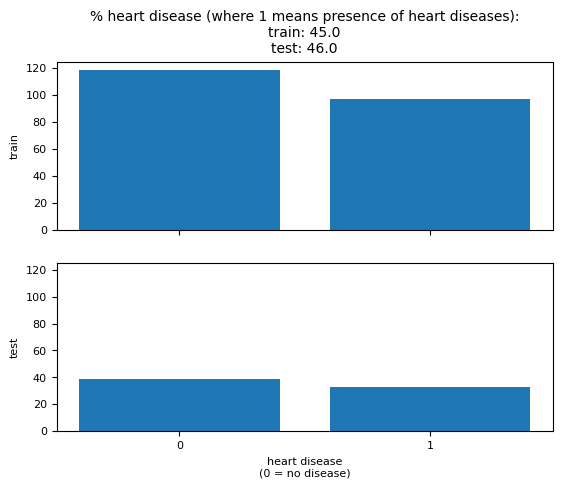

In [74]:
plot_y_ratios(y_train, y_test)

In [75]:
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv',index = False)